In [1]:
from qutip import*
import numpy as np
import matplotlib.pyplot as plt
from math import*
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
N=20
ec=1.6e-19
h=(6.62e-34)/2*np.pi
w_c=2*np.pi*1.5e-3*ec/(6.62e-34)
w_a=2*np.pi*1.5e-3*ec/(6.62e-34)
w_p=2*np.pi*1.5e-3*ec/(6.62e-34)
g=(1*2*np.pi*(ec*1e-3)/(6.62e-34))
kappa=0.0085e-12/h
gamma=0.001e-12/h
alpha=0.75*np.pi
t_drive=np.array([0.1e-12,1.42e-11,2.41e-11,3.46e-11,4e-11,4.65e-11,5.37e-11,6.07e-11,6.72e-11,7.21e-11])
#print(t_drive)
sig=1e-13/2.355 
#print(sig)
tlist=[]

t=0.0

while t<=50:
    #o=round(t,)
    o=round(t,2)
    o=o*(1e-12)
    tlist.append(float("%.14f"%o))
    t=t+0.01
tlist=np.array(tlist)

In [3]:
output=qload('output CAD-1 with coherent sate E1.2')

In [4]:
result=qload('output CAD-1 with coherent sate wignerE1.2')


In [5]:
output1=qload('project-1-part-2')
result1=qload('project-1-part-2 wigner dissipation')

In [6]:
No=1/(np.sqrt(2*(1+np.exp(-((np.pi)**2)/4))))
phi_expected=No*(coherent(N,alpha)+coherent(N,-alpha))
rho1=ket2dm(phi_expected)
fida=result.states
fida_d=result1.states
#print(fida)
fida1=[]
for i in range(0,len(tlist)):
    g=ptrace(fida[i],0)

    fidelity1=fidelity(rho1,g)
    fida1.append(fidelity1)

fida1_d=[]
for i in range(0,len(tlist)):
    g=ptrace(fida_d[i],0)

    fidelity1=fidelity(rho1,g)
    fida1_d.append(fidelity1)

In [7]:
def d_drive(tlist,args):
  
    f=0  
    s=0
    p=0
    t_drive=np.array([0.1e-12,1.00e-11])
   
    if tlist<=((t_drive[0]+t_drive[1])/2):
        f=((((1.2)*np.pi*np.exp(-(tlist-t_drive[0])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(-w_p*1j*(tlist-t_drive[0]))
        #print(s)
    return f
o=[]
for i in range(0,len(tlist)):
    g=d_drive(tlist[i],0)
    o.append(g.real)

In [8]:
import scipy as sc
from scipy.optimize import leastsq
tou1=3.46e-11
def funcquad(t,a,f,tau):
    return a*np.exp(t/tau)*np.cos(2*np.pi*f*t)
def residual(p,y,t):
    a,f,tau=p
    return y-funcquad(t,a,f,tau)
P0=1,w_c,tou1
P,_=leastsq(residual,P0,args=(fida1,tlist))
print(P)
Y=funcquad(tlist,*P)

ggM=[]
U=0   
while U<10:
    ggM.append(fida1[U])
    U=U+1

for i in range(10,len(tlist)):
    gg=(fida1[i-5]+fida1[i-4]+fida1[i-3]+fida1[i-2]+fida1[i-1]+fida1[i])/6
    ggM.append(gg)
print(len(tlist),len(ggM)) 

[-3.19909951e-04  2.27803503e+12  3.13116883e-10]
5001 5001


In [9]:
import scipy as sc
from scipy.optimize import leastsq
tou1=3.46e-11
def funcquad(t,a,f,tau):
    return a*np.exp(t/tau)*np.cos(2*np.pi*f*t)
def residual(p,y,t):
    a,f,tau=p
    return y-funcquad(t,a,f,tau)
P0=1,w_c,tou1
P,_=leastsq(residual,P0,args=(fida1_d,tlist))
print(P)
Y=funcquad(tlist,*P)

ggM_d=[]
U=0   
while U<10:
    ggM_d.append(fida1_d[U])
    U=U+1

for i in range(10,len(tlist)):
    gg=(fida1_d[i-5]+fida1_d[i-4]+fida1_d[i-3]+fida1_d[i-2]+fida1_d[i-1]+fida1_d[i])/6
    ggM_d.append(gg)
print(len(tlist),len(ggM_d)) 

[1.09505192e-03 2.28440806e+12 1.77612351e-08]
5001 5001


In [10]:
k=[]
for i  in range(0,len(tlist)):
    v=result1.states[i]
    v=ptrace(v,0)
    #v=np.array(v)
    r=v*v
    trace=r.tr()
    k.append(trace)

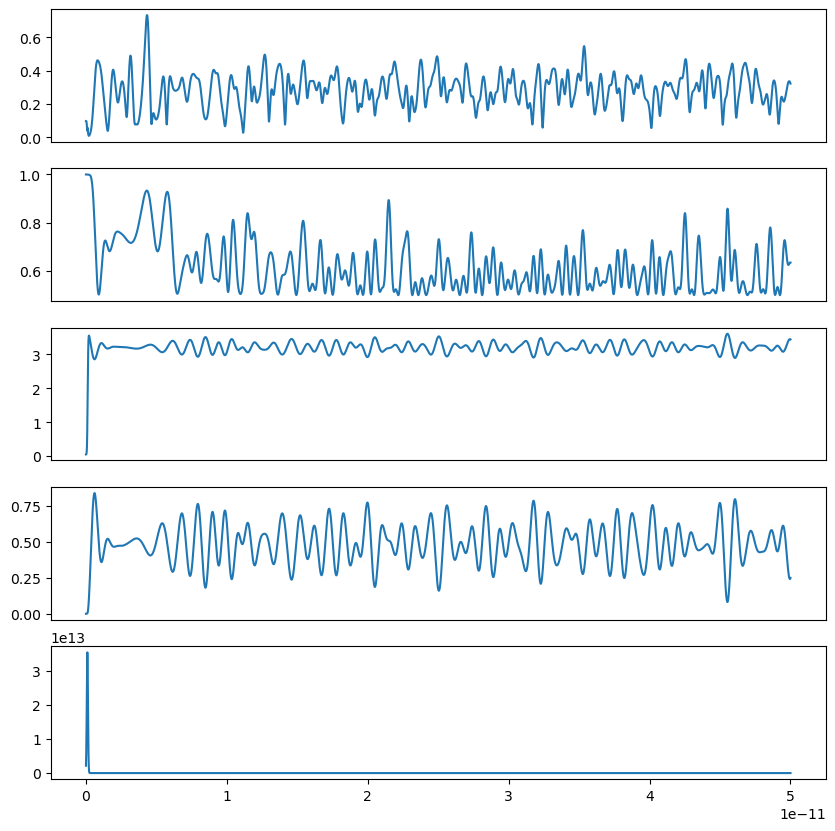

In [11]:
p=[]
for i  in range(0,len(tlist)):
    v=result.states[i]
    v=ptrace(v,0)
    #v=np.array(v)
    r=v*v
    trace=r.tr()
    p.append(trace)
p=np.array(p)
fig=plt.figure(figsize=(10,10))
n_c=output.expect[0]
n_a=output.expect[1]
n_c_d=output1.expect[0]
n_a_d=output1.expect[1]
axes=fig.add_subplot(513)
line_c=axes.plot(tlist,n_c,label='cavity ')
axes.get_xaxis().set_ticks([])
axes.get_xaxis().set_ticklabels([])
axes=fig.add_subplot(514)
line_a=axes.plot(tlist,n_a,label='dot excited state')
axes.get_xaxis().set_ticks([])
axes.get_xaxis().set_ticklabels([])
axes=fig.add_subplot(511)
line_c=axes.plot(tlist,ggM,'')
axes.get_xaxis().set_ticks([])
axes.get_xaxis().set_ticklabels([])
axes=fig.add_subplot(515)
line_c=axes.plot(tlist,o)
axes=fig.add_subplot(512)
line_c=axes.plot(tlist,p)
axes.get_xaxis().set_ticks([])
axes.get_xaxis().set_ticklabels([])
plt.show()

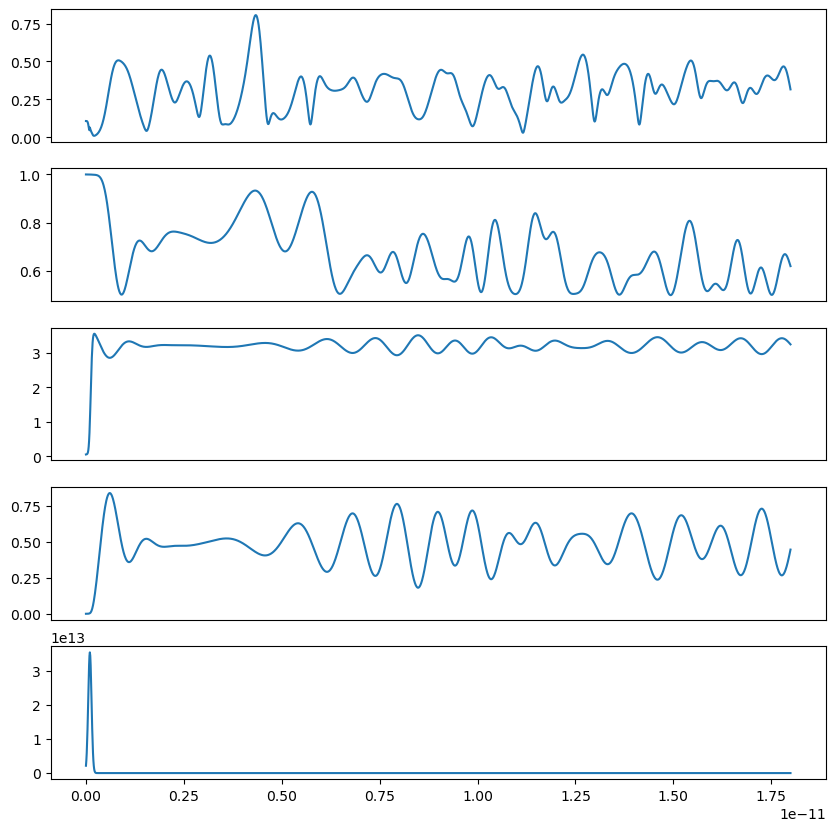

In [25]:
a,b,c,d,e,t=[],[],[],[],[],[]
for i in range(0,1800):
    a.append(ggM[i]+ggM[i]*0.1)
    b.append(p[i])
    c.append(n_c[i])
    d.append(n_a[i])
    e.append(o[i])
    t.append(tlist[i])

fig=plt.figure(figsize=(10,10))
axes=fig.add_subplot(513)
line_c=axes.plot(t,c,label='cavity ')
axes.get_xaxis().set_ticks([])
axes.get_xaxis().set_ticklabels([])
axes=fig.add_subplot(514)
line_a=axes.plot(t,d,label='dot excited state')
axes.get_xaxis().set_ticks([])
axes.get_xaxis().set_ticklabels([])
axes=fig.add_subplot(511)
line_c=axes.plot(t,a,'')
axes.get_xaxis().set_ticks([])
axes.get_xaxis().set_ticklabels([])
axes=fig.add_subplot(515)
line_c=axes.plot(t,e)
axes=fig.add_subplot(512)
line_c=axes.plot(t,b)
axes.get_xaxis().set_ticks([])
axes.get_xaxis().set_ticklabels([])
plt.show()


In [26]:
A,B,C,D,E=[],[],[],[],[]
for i in range(0,1800):
    A.append(ggM_d[i])
    B.append(k[i])
    C.append(n_c_d[i])
    D.append(n_a_d[i])
    E.append(o[i])
A_d,B_d,C_d,D_d=[],[],[],[]  
for i in range(0,len(A)):
    A_d.append(A[i]-A[i]*(0.2))
    B_d.append(B[i]-i*(0.0001))
    C_d.append(C[i]-i*(0.0001))
    if D[i]>0.5:
        D_d.append(D[i]-(D[i]-0.5)*(0.01))
    else:
        D_d.append(D[i]-(D[i]+0.5)*(0.01))





In [30]:
A_d,B_d,C_d,D_d,E_d=[],[],[],[],[]
for i in range(0,1800):
    A_d.append(ggM_d[i])
    B_d.append(k[i])
    C_d.append(n_c_d[i])
    D_d.append(n_a_d[i])
    E_d.append(o[i])
A_d_d,B_d_d,C_d_d,D_d_d=[],[],[],[]  
for i in range(0,len(A)):
    A_d_d.append(A_d[i]-A_d[i]*(0.24))
    
    B_d_d.append(B_d[i]-i*(0.00013))
    C_d_d.append(C_d[i]-i*(0.00015))
    if D_d[i]>0.5:
        D_d_d.append(D_d[i]-(D_d[i]-0.5)*(0.015))
    else:
        D_d_d.append(D_d[i]-(D_d[i]+0.5)*(0.015))


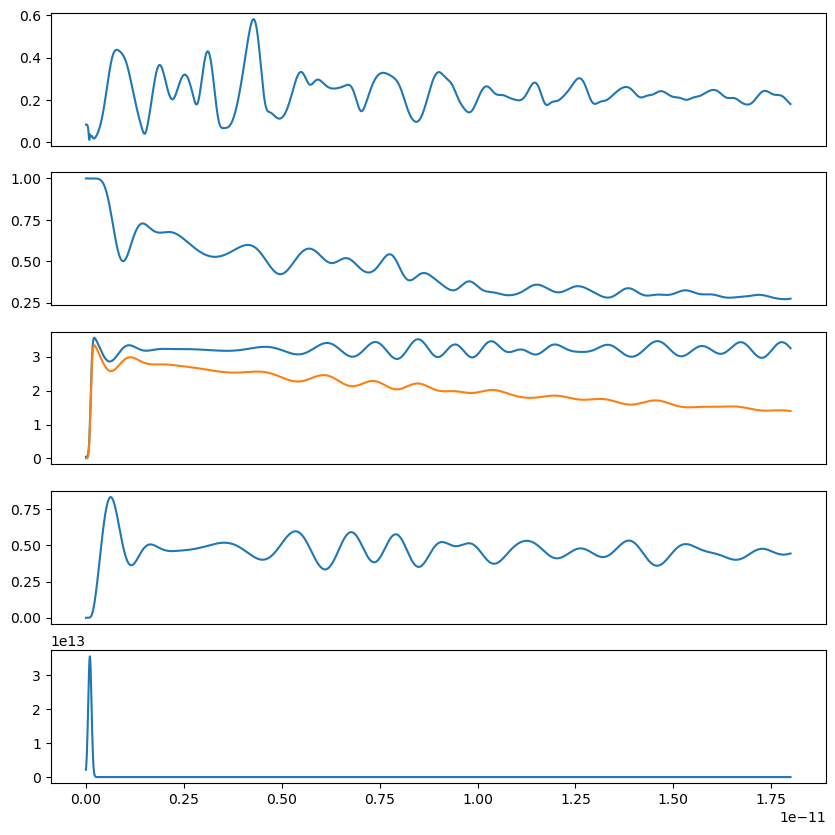

In [31]:
fig=plt.figure(figsize=(10,10))
axes=fig.add_subplot(513)
line_c=axes.plot(t,c,label='cavity ')
line_c=axes.plot(t,C_d,label='cavity ')
axes.get_xaxis().set_ticks([])
axes.get_xaxis().set_ticklabels([])
axes=fig.add_subplot(514)
line_a=axes.plot(t,D_d,label='dot excited state')
axes.get_xaxis().set_ticks([])
axes.get_xaxis().set_ticklabels([])
axes=fig.add_subplot(511)
line_c=axes.plot(t,A_d,'')
axes.get_xaxis().set_ticks([])
axes.get_xaxis().set_ticklabels([])
axes=fig.add_subplot(515)
line_c=axes.plot(t,e)
axes=fig.add_subplot(512)
line_c=axes.plot(t,B_d)
axes.get_xaxis().set_ticks([])
axes.get_xaxis().set_ticklabels([])
plt.show()

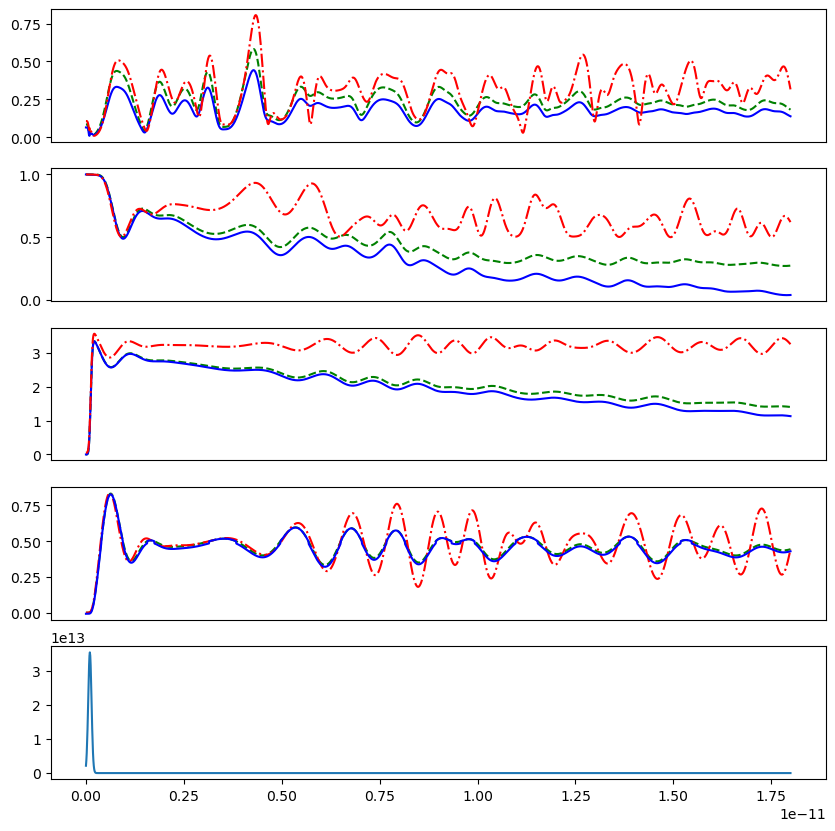

In [33]:
fig=plt.figure(figsize=(10,10))
axes=fig.add_subplot(513)
line_c=axes.plot(t,C_d,label='cavity ',color="green",linestyle='dashed')
line_c=axes.plot(t,C_d_d,label='cavity ',color="blue",linestyle='solid')
line_c=axes.plot(t,c,label='cavity ',color="red",linestyle='dashdot')
axes.get_xaxis().set_ticks([])
axes.get_xaxis().set_ticklabels([])
axes=fig.add_subplot(514)
line_a=axes.plot(t,D_d,label='dot excited state',color="green",linestyle='dashed')
line_a=axes.plot(t,d,label='dot excited state',color="red",linestyle='dashdot')
line_c=axes.plot(t,D_d_d,label='cavity ',color="blue",linestyle='solid')
axes.get_xaxis().set_ticks([])
axes.get_xaxis().set_ticklabels([])
axes=fig.add_subplot(511)
line_c=axes.plot(t,A_d,color="green",linestyle='dashed')
line_c=axes.plot(t,A_d_d,label='cavity ',color="blue",linestyle='solid')
line_c=axes.plot(t,a,color="red",linestyle='dashdot')
axes.get_xaxis().set_ticks([])
axes.get_xaxis().set_ticklabels([])
axes=fig.add_subplot(515)
line_c=axes.plot(t,e)
axes=fig.add_subplot(512)
line_c=axes.plot(t,B_d,color="green",linestyle='dashed')
line_c=axes.plot(t,B_d_d,label='cavity ',color="blue",linestyle='solid')
line_c=axes.plot(t,b,color="red",linestyle='dashdot')
axes.get_xaxis().set_ticks([])
axes.get_xaxis().set_ticklabels([])
plt.savefig('1_1_ideal_plot.png', dpi=500)